In [1]:
import os
import numpy as np
from cobaya.model import get_model
from cobaya.yaml import yaml_load
import matplotlib.pyplot as plt


info_txt = """
theory:
  BackgroundTheory:
    external: !!python/name:backgroundmnu.BackgroundTheory ''
    extra_args:
      Nmassive: 1
      mnu_model: symmetric
params:
  omega_b0:
    prior:
      min: 0.021
      max: 0.024
    ref: 0.0224
    proposal: 0.0001
    latex: \\Omega_b h^2
  omega_cdm0:
    prior:
      min: 0.11
      max: 0.13
    ref: 0.120
    proposal: 0.001
    latex: \\Omega_c h^2
  mnu:
    prior:
      min: 0.01
      max: 0.3
    ref: 0.06
    proposal: 0.01
    latex: \\sum m_\\nu
  omega_de0:
    prior:
      min: 0.0
      max: 1.0
    ref: 0.31
    proposal: 0.01
    latex: \\Omega_{\\Lambda}
  h:
    latex: h
    derived: true
  theta_star:
    latex: \\theta_*
    derived: true
  rdrag:
    latex: r_\\mathrm{drag}
    derived: true
likelihood:
    backgroundmnu.BackgroundLikelihood:
      external: !!python/name:backgroundmnu.BackgroundLikelihood ''
      data_file: P-ACT
      mode: 2p
"""


info = yaml_load(info_txt)

model = get_model(info)

Loading data from:  /Users/gabe/projects/backgroundmnu/backgroundmnu/data/P-ACT.pkl


In [2]:
point = dict(zip(model.parameterization.sampled_params(),
                 model.prior.sample(ignore_external=True)[0]))

point.update({'omega_b0': 0.0223, 'omega_cdm0': 0.120, 'omega_de0': 0.31,
              'mnu': 0.06})

logposterior = model.logposterior(point, as_dict=True)

 pyhyrec/Background.py:160: overflow encountered in exp (RuntimeWarning)
 pyhyrec/_minpack_py.py:177: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations. (RuntimeWarning)


In [3]:
logposterior

{'logpost': 9.442352427426012,
 'logpriors': {'0': 10.959040351743791},
 'loglikes': {'backgroundmnu.BackgroundLikelihood': -1.5166879243177798},
 'derived': {'h': 0.6730839410765332,
  'theta_star': 0.01040755078091386,
  'rdrag': 147.14388039079128}}

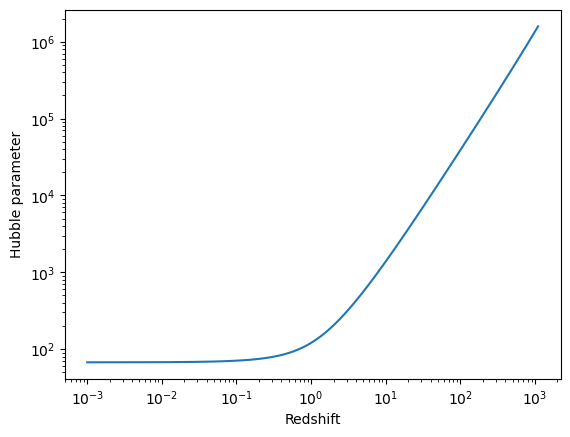

In [4]:
redshifts = np.logspace(-3, np.log10(1100), 500)
model.add_requirements({"Hubble": {"z": redshifts}})
logposterior = model.logposterior(point, as_dict=True)
H = model.provider.get_Hubble(redshifts)


fig,ax = plt.subplots()

ax.plot(redshifts, H)
ax.set_xlabel("Redshift")
ax.set_ylabel("Hubble parameter")
ax.set_yscale("log")
ax.set_xscale("log")